In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
cardio_train_data_set = pd.read_csv("cardio-train.csv", sep = ';')
cardio_test_data_set = pd.read_csv("cardio-test.csv", sep = ',')

In [3]:
cardio_train_data_set

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74393,NaN,Women,174.0,73.0,130.0,NaN,NaN,Normal,0.0,0.0,1.0,1
496,38938,NaN,Men,NaN,89.0,130.0,NaN,High,Normal,0.0,0.0,NaN,1
497,9037,NaN,Women,180.0,84.0,NaN,NaN,Normal,Above Normal,1.0,0.0,1.0,0
498,27539,NaN,Women,NaN,NaN,110.0,70.0,NaN,NaN,NaN,0.0,1.0,0


In [18]:
#Nominal
#Categorical
cardio_train_data_set.dtypes == "object"
#Gender, cholesterol, and glucose are categorical variables

id             False
age            False
gender          True
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol     True
gluc            True
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [17]:
cardio_train_data_set.dtypes

id               int64
age            float64
gender          object
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol     object
gluc            object
smoke          float64
alco           float64
active         float64
cardio           int64
dtype: object

In [5]:
#Use dataframe.info and dataframe.describe to get the insights about the data
cardio_train_data_set.info


<bound method DataFrame.info of         id      age gender  height  weight  ap_hi  ap_lo cholesterol  \
0    92150  20535.0    NaN   163.0    75.0  120.0    NaN         NaN   
1    88880  16125.0    Men   168.0    68.0  110.0   70.0         NaN   
2    10483  19761.0    NaN   170.0    75.0  120.0    NaN         NaN   
3    22798  19035.0    Men     NaN    89.0    NaN   80.0      Normal   
4    85542      NaN    NaN   158.0    74.0    NaN   93.0        High   
..     ...      ...    ...     ...     ...    ...    ...         ...   
495  74393      NaN  Women   174.0    73.0  130.0    NaN         NaN   
496  38938      NaN    Men     NaN    89.0  130.0    NaN        High   
497   9037      NaN  Women   180.0    84.0    NaN    NaN      Normal   
498  27539      NaN  Women     NaN     NaN  110.0   70.0         NaN   
499  13409  16698.0    Men     NaN    59.0    NaN    NaN      Normal   

             gluc  smoke  alco  active  cardio  
0          Normal    0.0   0.0     1.0       0  
1    

In [6]:
def get_nulls(column_in_question):
    count_of_nulls = 0
    for i in range(0, len(column_in_question)):
        if column_in_question[i] == True:
            count_of_nulls = count_of_nulls + 1
    return count_of_nulls

In [7]:
#Find the number of null values for each columns
number_of_nulls_age = pd.isnull(cardio_train_data_set["age"])
count_of_nulls_age = get_nulls(number_of_nulls_age)

number_of_nulls_gender = pd.isnull(cardio_train_data_set["gender"])
count_of_nulls_gender = get_nulls(number_of_nulls_gender)

number_of_nulls_height = pd.isnull(cardio_train_data_set["height"])
count_of_nulls_height = get_nulls(number_of_nulls_height)

number_of_nulls_weight = pd.isnull(cardio_train_data_set["weight"])
count_of_nulls_weight = get_nulls(number_of_nulls_weight)

number_of_nulls_ap_hi = pd.isnull(cardio_train_data_set["ap_hi"])
count_of_nulls_ap_hi = get_nulls(number_of_nulls_ap_hi)

number_of_nulls_ap_lo = pd.isnull(cardio_train_data_set["ap_lo"])
count_of_nulls_ap_lo = get_nulls(number_of_nulls_ap_lo)

number_of_nulls_cholesterol = pd.isnull(cardio_train_data_set["cholesterol"])
count_of_nulls_cholesterol = get_nulls(number_of_nulls_cholesterol)

number_of_nulls_glucose = pd.isnull(cardio_train_data_set["gluc"])
count_of_nulls_glucose = get_nulls(number_of_nulls_glucose)

number_of_nulls_smoke = pd.isnull(cardio_train_data_set["smoke"])
count_of_nulls_smoke = get_nulls(number_of_nulls_smoke)

number_of_nulls_alcohol = pd.isnull(cardio_train_data_set["alco"])
count_of_nulls_alcohol = get_nulls(number_of_nulls_alcohol)

number_of_nulls_active = pd.isnull(cardio_train_data_set["active"])
count_of_nulls_active = get_nulls(number_of_nulls_active)
#toDo, find amount of nans for the other columns

In [8]:
print("Nulls in Age: ",count_of_nulls_age)
print("Nulls in Gender: ",count_of_nulls_gender)
print("Nulls in Height: ",count_of_nulls_height)
print("Nulls in Weight: ",count_of_nulls_weight)
print("Nulls in AP_HI: ",count_of_nulls_ap_hi)
print("Nulls in AP_LO: ",count_of_nulls_ap_lo)
print("Nulls in Cholesterol: ",count_of_nulls_cholesterol)
print("Nulls in Glucose: ",count_of_nulls_glucose)
print("Nulls in Smoke: ",count_of_nulls_smoke)
print("Nulls in Alcohol: ",count_of_nulls_alcohol)
print("Nulls in Active: ",count_of_nulls_active)

Nulls in Age:  165
Nulls in Gender:  171
Nulls in Height:  302
Nulls in Weight:  164
Nulls in AP_HI:  153
Nulls in AP_LO:  168
Nulls in Cholesterol:  167
Nulls in Glucose:  167
Nulls in Smoke:  174
Nulls in Alcohol:  165
Nulls in Active:  157


In [9]:
#find oldest
#find youngest
oldest_person_idx = 0
youngest_person_idx = 0
for i in range(0, len(cardio_train_data_set["age"])):
    if cardio_train_data_set["age"][i] > cardio_train_data_set["age"][oldest_person_idx]:
        oldest_person_idx = i
        
for i in range(0, len(cardio_train_data_set["age"])):
    if cardio_train_data_set["age"][i] < cardio_train_data_set["age"][youngest_person_idx]:
        youngest_person_idx = i
        
print(cardio_train_data_set["age"][oldest_person_idx])
print(cardio_train_data_set["age"][youngest_person_idx])


#find median = 19719.0
#find Average = 19490.886567
median = cardio_train_data_set.median(axis = 0)
mean = cardio_train_data_set.mean(axis = 0)

print(median, "\n", mean)


23479.0
14334.0
id        51913.5
age       19719.0
height      165.0
weight       72.0
ap_hi       120.0
ap_lo        80.0
smoke         0.0
alco          0.0
active        1.0
cardio        1.0
dtype: float64 
 id        50279.916000
age       19490.886567
height      163.934343
weight       74.347321
ap_hi       128.685879
ap_lo        90.060241
smoke         0.092025
alco          0.065672
active        0.813411
cardio        0.502000
dtype: float64


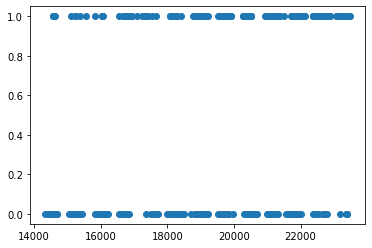

In [10]:
#age vs cardio column
plt.scatter(cardio_train_data_set["age"], cardio_train_data_set["cardio"])
#not a good plot


<function matplotlib.pyplot.show(close=None, block=None)>

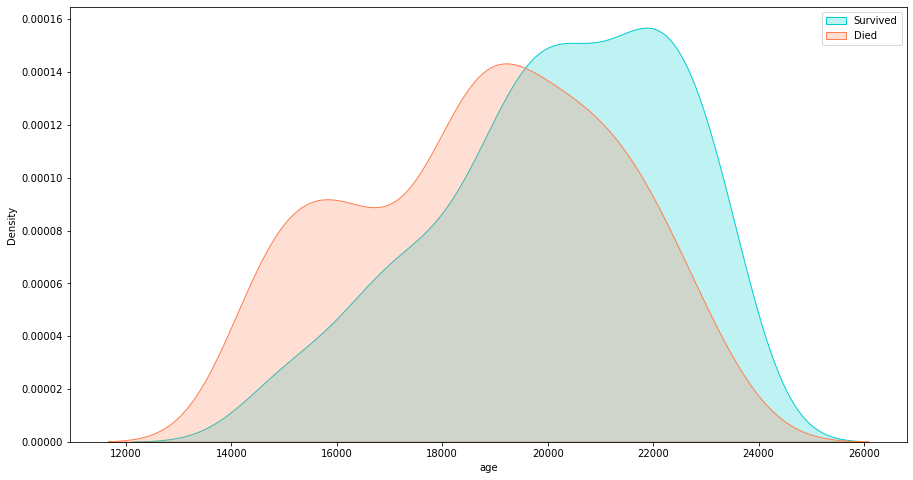

In [11]:
#age vs cardio

plt.figure(figsize = (15,8))

sns.kdeplot(
    cardio_train_data_set.age[cardio_train_data_set["cardio"] == 1],
    color = "darkturquoise",
    shade = True 
)
sns.kdeplot(
    cardio_train_data_set.age[cardio_train_data_set["cardio"] == 0],
    color = "coral",
    shade = True 
)

plt.legend(["Survived", "Died"])
plt.show

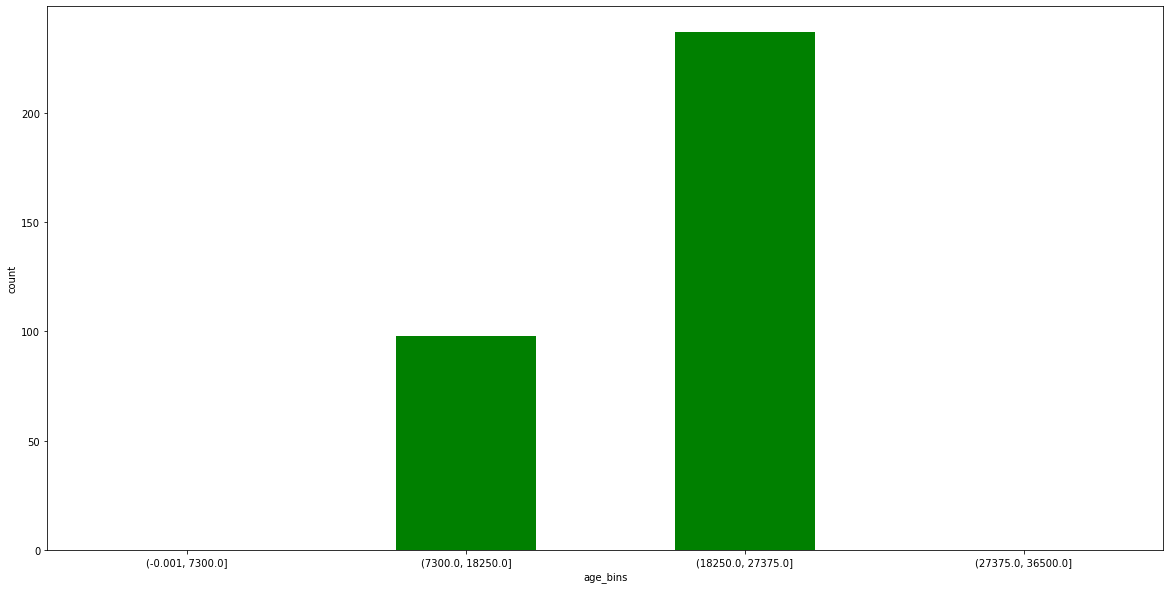

In [12]:
bins = [0, 7300, 18250, 27375, 36500]

out = pd.cut(
    cardio_train_data_set.age, 
    bins = bins, 
    include_lowest = True

)
ax = out.value_counts(sort = False).plot.bar(
    rot = 0,
    color = "g",
    figsize = (20,10)
)
plt.xlabel("age_bins")
plt.ylabel("count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

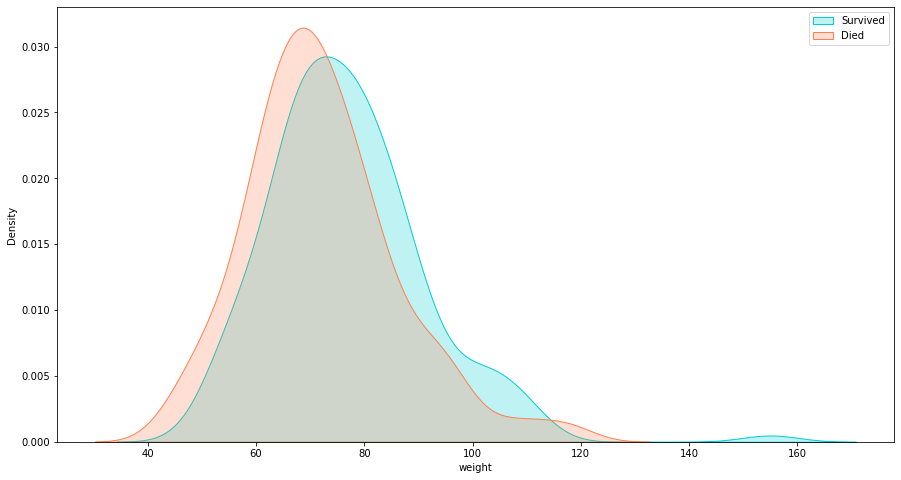

In [13]:
plt.figure(figsize = (15,8))

sns.kdeplot(
    cardio_train_data_set.weight[cardio_train_data_set["cardio"] == 1],
    color = "darkturquoise",
    shade = True 
)
sns.kdeplot(
    cardio_train_data_set.weight[cardio_train_data_set["cardio"] == 0],
    color = "coral",
    shade = True 
)

plt.legend(["Survived", "Died"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

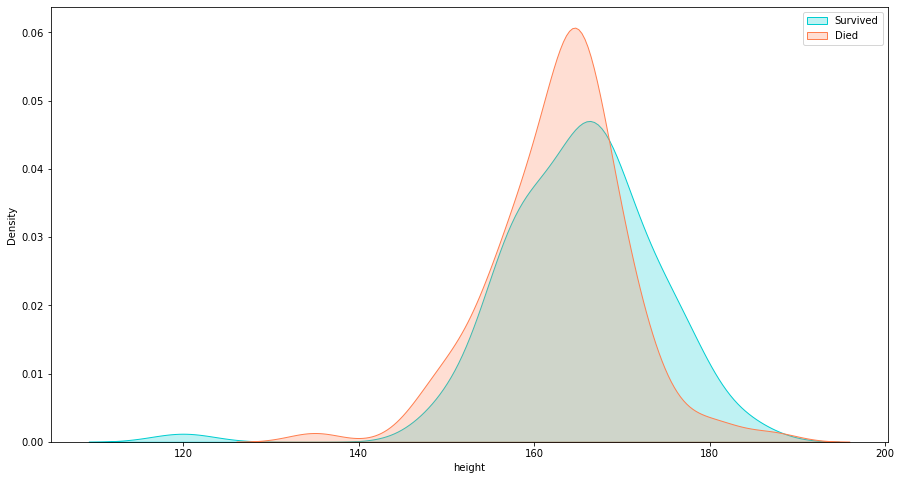

In [14]:
plt.figure(figsize = (15,8))

sns.kdeplot(
    cardio_train_data_set.height[cardio_train_data_set["cardio"] == 1],
    color = "darkturquoise",
    shade = True 
)
sns.kdeplot(
    cardio_train_data_set.height[cardio_train_data_set["cardio"] == 0],
    color = "coral",
    shade = True 
)

plt.legend(["Survived", "Died"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

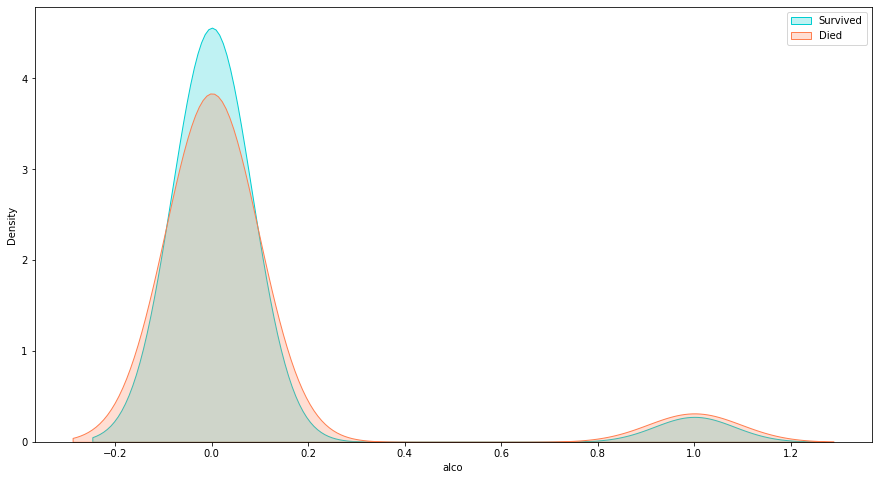

In [20]:
plt.figure(figsize = (15,8))

sns.kdeplot(
    cardio_train_data_set.alco[cardio_train_data_set["cardio"] == 1],
    color = "darkturquoise",
    shade = True 
)
sns.kdeplot(
    cardio_train_data_set.alco[cardio_train_data_set["cardio"] == 0],
    color = "coral",
    shade = True 
)

plt.legend(["Survived", "Died"])
plt.show

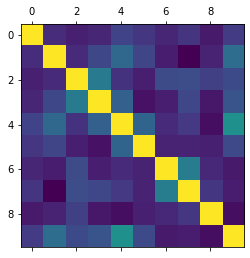

In [16]:
#Make plot bigger
plt.matshow(cardio_train_data_set.corr())
plt.show()

In [ ]:
#figure out scatter plot

In [ ]:
#per column distribution